In [ ]:
!git clone https://github.com/x0R3d/xrays_dataton.git

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

# Анализ данных

In [9]:
df = pd.read_csv('xrays_dataton/xrays_data.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800


## Очистка данных:

In [ ]:
df = df[[
    'Image Index',
    'Finding Labels',
    'Follow-up #',
    'Patient ID',
    'Patient Age',
    'Patient Gender'
]]

pathology_list = [
    'Cardiomegaly',
    'Emphysema',
    'Effusion',
    'Hernia',
    'Nodule',
    'Pneumothorax',
    'Atelectasis',
    'Pleural_Thickening',
    'Mass',
    'Edema',
    'Consolidation',
    'Infiltration',
    'Fibrosis',
    'Pneumonia'
]

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)


## Анализ возраста пациентов:

In [5]:
df['Patient Age'].sort_values(ascending=False).head(20)

58464     95
588       94
587       94
586       94
74734     93
74735     93
74729     93
74731     93
74736     93
74730     93
74733     93
5358      93
39016     93
74732     93
74737     93
68951     92
108422    92
232       92
3762      92
585       92
Name: Patient Age, dtype: int64

У нас есть странные значения для «Follow-up #» по сравнению с «Patient Age». Таким образом, мы не можем считать, что «Follow-up #» расположены в хронологическом порядке:

In [6]:
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Follow-up #',ascending=True)
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age',ascending=False)

,Patient Age,Finding Labels,Follow-up #
20877,56,No Finding,25
20876,56,Fibrosis,24
20875,56,Fibrosis,23
20874,54,No Finding,22
20873,54,Atelectasis,21
20872,54,Atelectasis,20
20866,53,Atelectasis|Consolidation,14
20871,53,Infiltration,19
20870,53,Atelectasis|Effusion|Pneumonia,18
20869,53,Effusion,17


## Отображение количества каждого заболевания по полу пациента

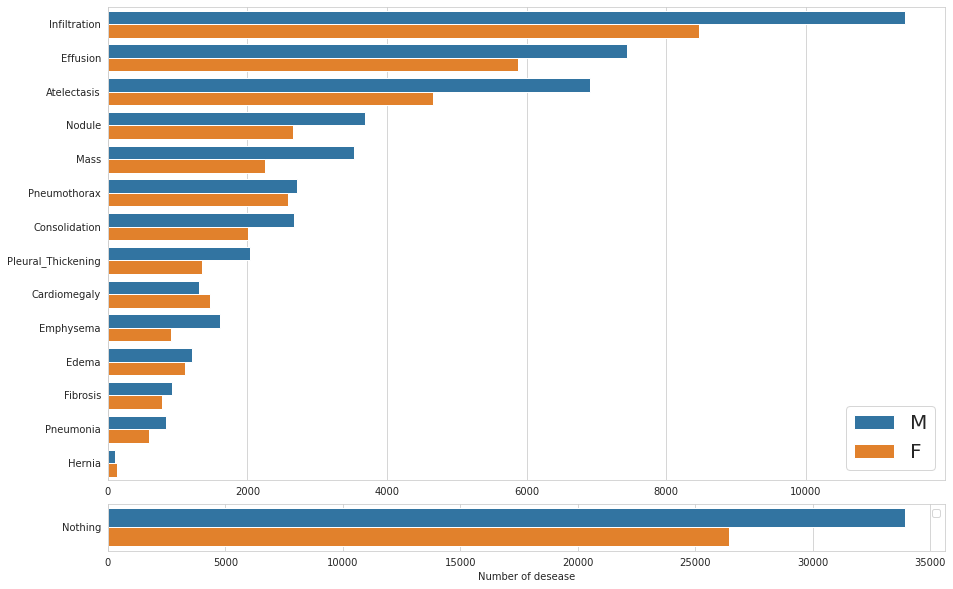

In [38]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g = sns.countplot(
    y='Category',
    hue='Patient Gender',
    data=data1,
    ax=ax1,
    order = data1['Category'].value_counts().index
)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)

df['Nothing'] = df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g = sns.countplot(y='Category', hue='Patient Gender', data=data2,ax=ax2)
ax2.set( ylabel="", xlabel="Number of desease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

## Теперь проверим распределение возраста по полу

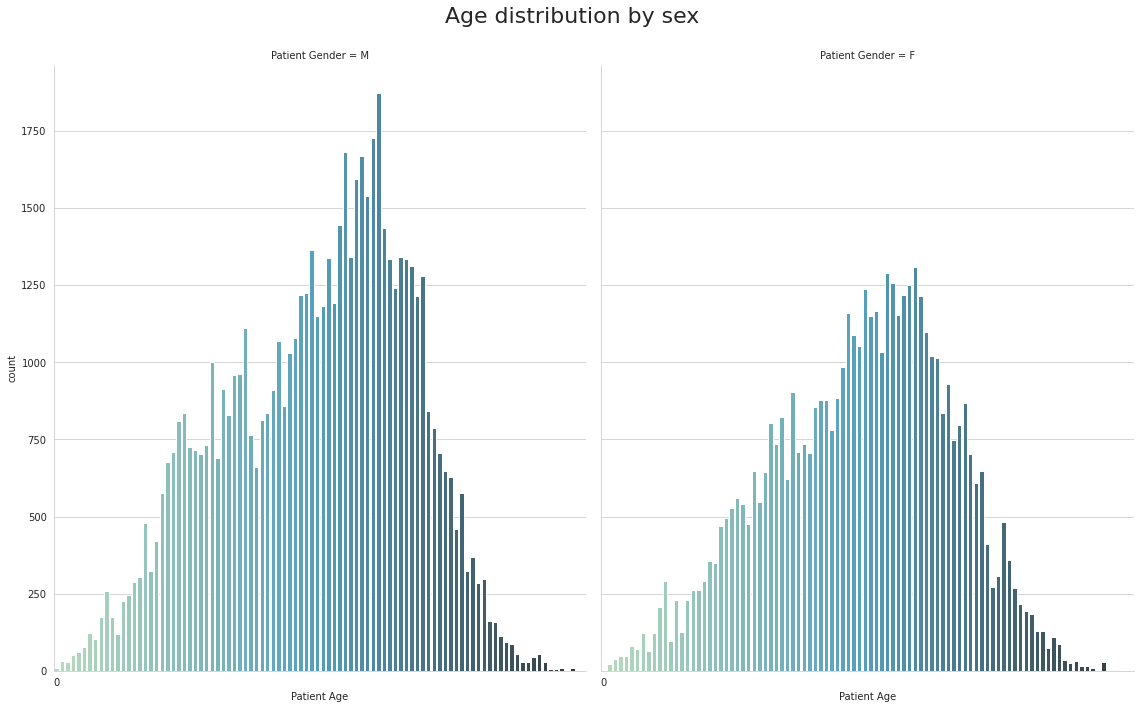

In [22]:
g = sns.factorplot(
    x="Patient Age",
    col="Patient Gender",
    data=df,
    kind="count",
    size=10,
    aspect=0.8,
    palette="GnBu_d"
)
g.set_xticklabels(np.arange(0,100))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex',fontsize=22)
g.fig.subplots_adjust(top=.9)

## Отображение распределения патологий по возрасту и полу

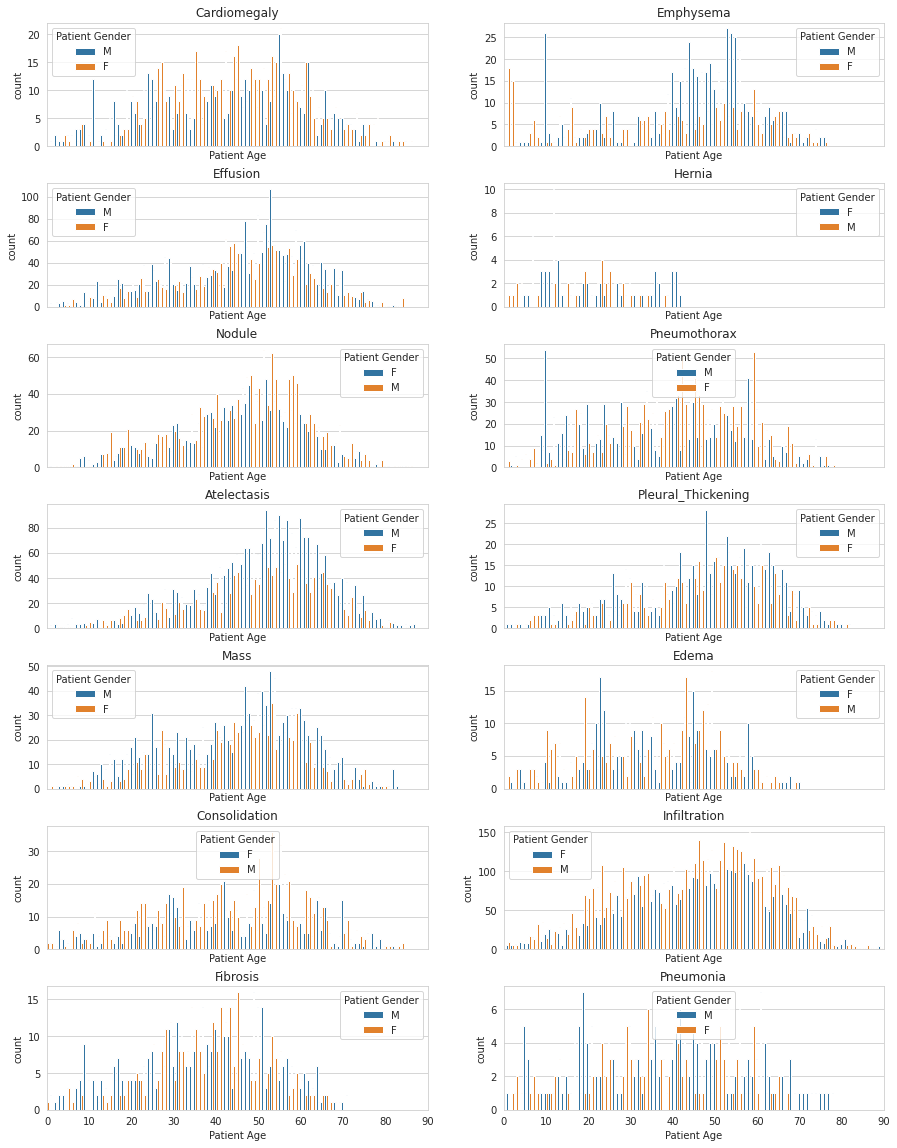

In [23]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    g = sns.countplot(
        x='Patient Age',
        hue="Patient Gender",
        data=df[df['Finding Labels']==pathology],
        ax=axarr[i, j]
    )
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j = (j+1)%2
    if j==0:
        i = (i+1)%7
f.subplots_adjust(hspace=0.3)

## Отображение номера пациента по Follow-up

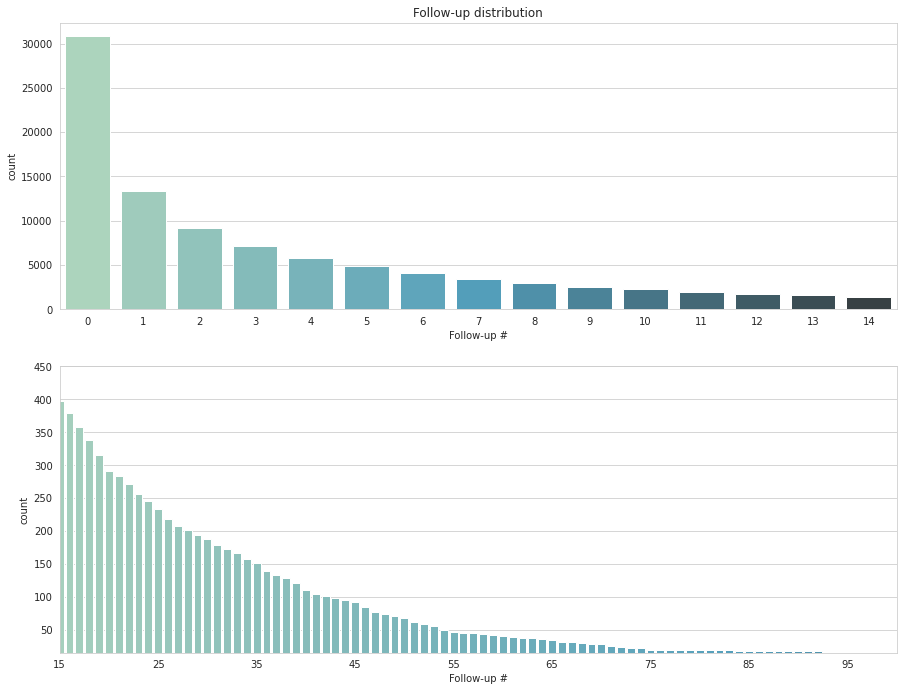

In [24]:
f, (ax1,ax2) = plt.subplots(2, figsize=(15, 10))

data = df[df['Follow-up #']<15]
g = sns.countplot(x='Follow-up #', data=data, palette="GnBu_d", ax=ax1)

ax1.set_title('Follow-up distribution')
data = df[df['Follow-up #']>14]
g = sns.countplot(x='Follow-up #', data=data, palette="GnBu_d",ax=ax2)
x = np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

## Попробуем найти связь между патологиями

In [37]:
data = df.groupby('Finding Labels').count().sort_values(
    'Patient ID',
    ascending=False
).head(23)
data = data[['|' in index for index in data.index.values]]
data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing
Finding Labels,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603
Atelectasis|Infiltration,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
Atelectasis|Effusion,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
Infiltration|Nodule,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829
Atelectasis|Effusion|Infiltration,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737,737
Cardiomegaly|Effusion,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484
Consolidation|Infiltration,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441
Infiltration|Mass,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420
Effusion|Pneumothorax,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403


Теперь нам нужно сравнить соотношение между простыми и множественными заболеваниями.

In [36]:
data = df.groupby('Finding Labels').count().sort_values(
    'Patient ID',
    ascending=False
)
df1 = data[['|' in index for index in data.index]].copy()
df2 = data[['|' not in index for index in data.index]]
df2 = df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels'] = df2.index.values
df1['Finding Labels'] = df1.index.values

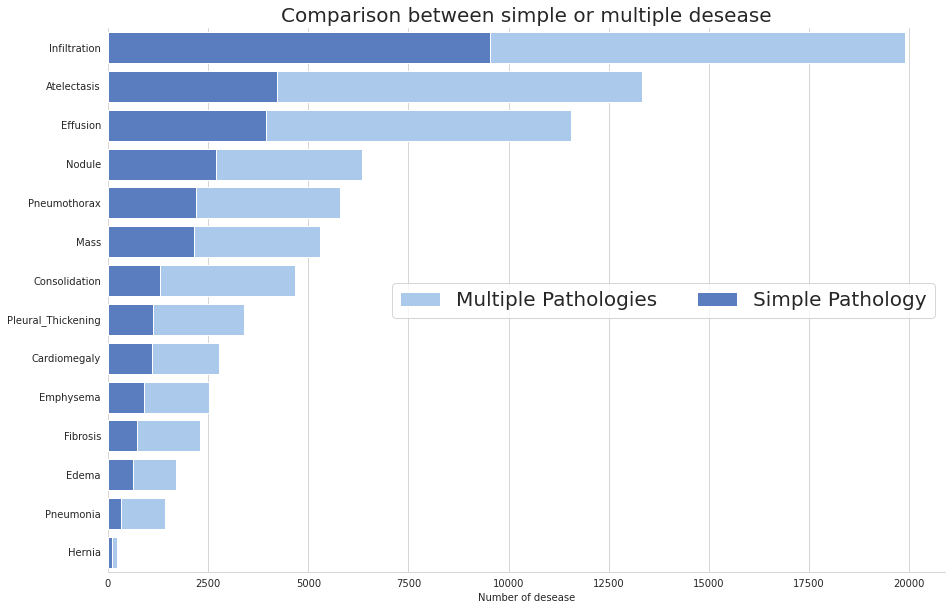

In [35]:
f, ax = plt.subplots(sharex=True, figsize=(15, 10))
sns.set_color_codes("pastel")
g = sns.countplot(
    y='Category',
    data=data1,
    ax=ax,
    order=data1['Category'].value_counts().index,
    color='b',
    label="Multiple Pathologies"
)
sns.set_color_codes("muted")
g = sns.barplot(
    x='Patient ID',
    y='Finding Labels',
    data=df2, ax=ax,
    color="b",
    label="Simple Pathology"
)
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set(ylabel="",xlabel="Number of desease")
ax.set_title("Comparison between simple or multiple desease", fontsize=20)      
sns.despine(left=True)

Отобразим наиболее важные группы патологий для каждого заболевания

In [33]:
df3 = df1.loc[df1['Patient ID']>30, ['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology] = df3.apply(
        lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0,
        axis=1
    )

df3.head(20)

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,Effusion|Infiltration,0,0,1603,0,0,0,0,0,0,0,0,1603,0,0
Atelectasis|Infiltration,1350,Atelectasis|Infiltration,0,0,0,0,0,0,1350,0,0,0,0,1350,0,0
Atelectasis|Effusion,1165,Atelectasis|Effusion,0,0,1165,0,0,0,1165,0,0,0,0,0,0,0
Infiltration|Nodule,829,Infiltration|Nodule,0,0,0,0,829,0,0,0,0,0,0,829,0,0
Atelectasis|Effusion|Infiltration,737,Atelectasis|Effusion|Infiltration,0,0,737,0,0,0,737,0,0,0,0,737,0,0
Cardiomegaly|Effusion,484,Cardiomegaly|Effusion,484,0,484,0,0,0,0,0,0,0,0,0,0,0
Consolidation|Infiltration,441,Consolidation|Infiltration,0,0,0,0,0,0,0,0,0,0,441,441,0,0
Infiltration|Mass,420,Infiltration|Mass,0,0,0,0,0,0,0,0,420,0,0,420,0,0
Effusion|Pneumothorax,403,Effusion|Pneumothorax,0,0,403,0,0,403,0,0,0,0,0,0,0,0


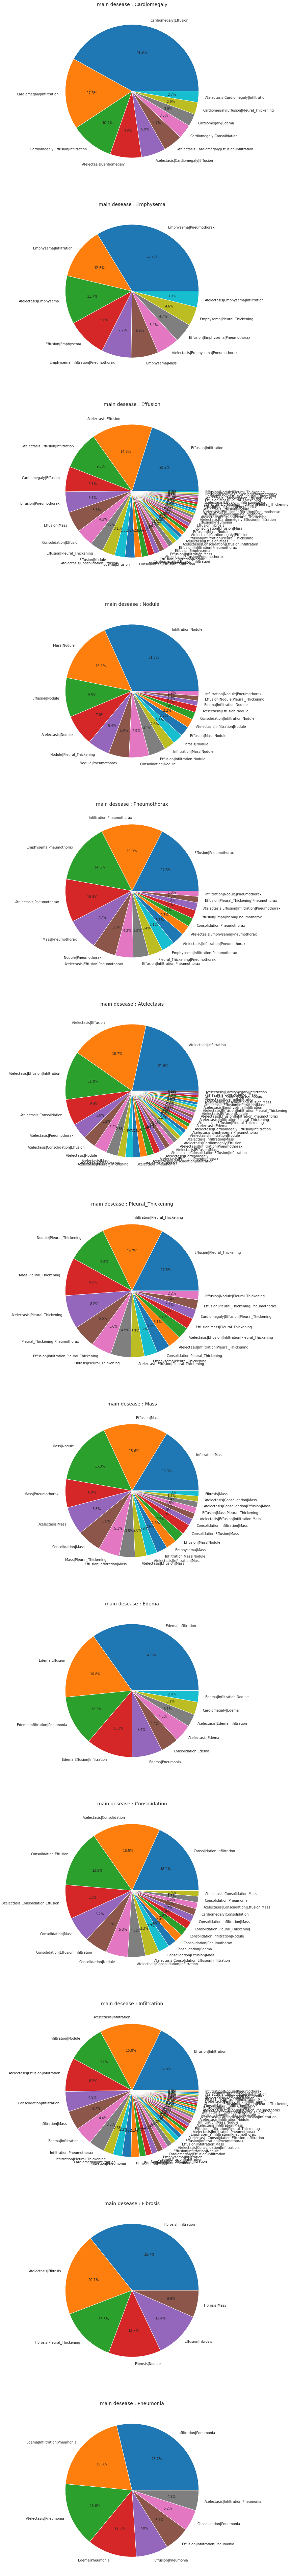

In [34]:
df4 = df3[df3['Hernia'] > 0]
pat_list = [elem for elem in pathology_list if 'Hernia' not in elem]

f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:
        axarr[i].pie(
            df4[pathology],
            labels = df4['Finding Labels'],
            autopct='%1.1f%%'
        )
        axarr[i].set_title('main desease : '+ pathology, fontsize=14)   
        i +=1